In [2]:
import pandas as pd
import joblib
import copy
import hashlib
import json
from datetime import datetime
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree

LOG

In [3]:
def create_log_template():
    logger = {
        'model_name' : [],
        'model_uid' : [],
        'training_time' : [],
        'performance' : [],
        'f1_score_avg' : [],
        'data_configurations' : [],
    }

    return logger


In [4]:
def training_log_updater(current_log, log_path):
    current_log = current_log.copy()

    try:
        with open(log_path, 'r') as file:
            last_log = json.load(file)
        file.close()
    except FileNotFoundError as ffe:
        with open(log_path, 'w') as file:
            file.write('[]')
        file.close()
        with open(log_path, 'r') as file:
            last_log = json.load(file)
        file.close()
    
    last_log.append(current_log)

    with open(log_path, 'w') as file:
        json.dump(last_log, file)
        file.close()

    return last_log

In [5]:
lgr_baseline = LogisticRegression()
dct_baseline = DecisionTreeClassifier()
rfc_baseline = RandomForestClassifier()
knn_baseline = KNeighborsClassifier()
xgb_baseline = XGBClassifier()

In [6]:
list_of_model = {
        'smote' : [
        { 'model_name': lgr_baseline.__class__.__name__, 'model_object': lgr_baseline, 'model_uid': ''},
        { 'model_name': dct_baseline.__class__.__name__, 'model_object': dct_baseline, 'model_uid': ''},
        { 'model_name': rfc_baseline.__class__.__name__, 'model_object': rfc_baseline, 'model_uid': ''},
        { 'model_name': knn_baseline.__class__.__name__, 'model_object': knn_baseline, 'model_uid': ''},
        { 'model_name': xgb_baseline.__class__.__name__, 'model_object': xgb_baseline, 'model_uid': ''}
        ],
    }

In [16]:
x_train = joblib.load('A:/projectwater/data/process/x_train.pkl')
y_train = joblib.load('A:/projectwater/data/process/y_train.pkl')
x_test = joblib.load('A:/projectwater/data/process/x_test.pkl')
y_test = joblib.load('A:/projectwater/data/process/y_test.pkl')
x_valid = joblib.load('A:/projectwater/data/process/x_valid.pkl')
y_valid = joblib.load('A:/projectwater/data/process/y_valid.pkl')

In [18]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
x_train

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethes,turbidity
2018,7.080795,237.083948,35434.280062,7.617649,381.337527,365.032503,13.453872,33.439868,3.825937
2740,6.789821,197.300014,22527.681207,5.166942,399.981755,422.482029,15.916605,47.935105,4.512068
2746,5.636924,159.139410,27283.780655,6.918727,328.907287,317.830981,13.611408,36.335199,3.007138
1468,6.279842,175.890640,11582.505249,7.059985,333.775777,430.322092,15.674785,86.760257,3.278584
1417,6.703487,182.129514,24316.875146,7.009806,341.333952,479.537497,20.088643,53.925045,4.223884
...,...,...,...,...,...,...,...,...,...
101,7.348845,223.264940,11519.046527,8.889559,333.775777,494.158434,18.145374,73.715522,4.880875
1734,3.928556,191.665998,17328.161457,7.692417,306.479558,406.085614,9.578602,45.480738,5.060836
394,8.736371,194.677687,24283.658791,8.855544,329.004205,333.623794,16.516232,67.250473,3.802116
2242,6.645657,170.269715,23432.109730,7.066565,333.775777,513.364946,20.264678,78.900888,4.170658


In [20]:
y_pred = rfc.predict(x_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.91      0.76       300
           1       0.65      0.27      0.38       191

    accuracy                           0.66       491
   macro avg       0.65      0.59      0.57       491
weighted avg       0.65      0.66      0.61       491



In [21]:
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76       300
           1       0.62      0.32      0.42       192

    accuracy                           0.66       492
   macro avg       0.64      0.60      0.59       492
weighted avg       0.65      0.66      0.63       492



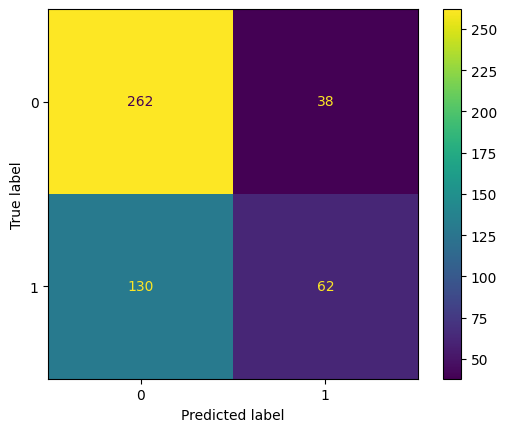

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [23]:
joblib.dump(rfc, 'A:/projectwater/models/models.pkl')

['A:/projectwater/models/models.pkl']